#### Challenge - 1. MTA Turnstile Data Extraction:


The challenge presents us with downloading data from MTA open data source, and wrangling through a bunch of issues that exists in the data.

Below here are my initial python modules that I brought it to the beginning of the code, though I wouldn't have known all of these up front, until I completed most part of these challenges.

Now a bit about the data sources: MTA turnstile data (for NYC) records turnstile counters on each station at every 4 hour interval (though there are some inconsistencies). Each .txt file corresponds to a week's worth of data.

In [2]:
from __future__ import division
import csv
from datetime import datetime
from collections import Counter
import glob
from copy import deepcopy

import pandas as pd
import numpy as np
import dateutil.parser

import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline
import seaborn as sns
#from ggplot import *
#from bokeh.charts import Scatter, output_file, show


In [3]:
urls = 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_%s.txt'
for date in ['150627', '150620', '150613', '150606']:
    url = urls % date
    !wget {url}

--2015-07-07 20:38:10--  http://web.mta.info/developers/data/nyct/turnstile/turnstile_150627.txt
Resolving web.mta.info... 23.67.242.81, 23.67.242.83, 23.67.242.11
Connecting to web.mta.info|23.67.242.81|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: `turnstile_150627.txt.1'

    [ <=>                                   ] 25,226,408  1.21M/s   in 19s     

2015-07-07 20:38:31 (1.25 MB/s) - `turnstile_150627.txt.1' saved [25226408]

--2015-07-07 20:38:31--  http://web.mta.info/developers/data/nyct/turnstile/turnstile_150620.txt
Resolving web.mta.info... 23.67.242.11, 23.67.242.83, 23.67.242.81
Connecting to web.mta.info|23.67.242.11|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: `turnstile_150620.txt.1'

    [                                  <=>  ] 25,316,798  3.55M/s   in 6.9s    

2015-07-07 20:38:38 (3.52 MB/s) - `turnstile_150620.txt.1' saved [25316798]

--2015

In [4]:
#!curl -O http://web.mta.info/developers/data/nyct/turnstile/turnstile_150627.txt

In [10]:
def read_multiple_files(files):
    allrows = []
    for filename in files:
        with open(filename) as f:
            reader = csv.reader(f)
            for num, row in enumerate(reader):
                if num == 0:
                    continue
                else:
                    rows = [[cell.strip() for cell in row] for row in reader]
            allrows.extend(rows)
    return allrows

In [11]:
files = [file for file in glob.glob('*.txt')]
allrows = read_multiple_files(files)

In [12]:
mta_raw_dict = {}
for row in allrows:
    mta_raw_dict.setdefault(tuple(row[:4]), []).append(tuple(row[4:]))

In [13]:
mta_raw_dict.items()[0]

(('A030', 'R083', '01-06-00', '23 ST-5 AVE'),
 [('NR',
   'BMT',
   '05/30/2015',
   '00:00:00',
   'REGULAR',
   '0005894820',
   '0003283260'),
  ('NR',
   'BMT',
   '05/30/2015',
   '04:00:00',
   'REGULAR',
   '0005894882',
   '0003283282'),
  ('NR',
   'BMT',
   '05/30/2015',
   '08:00:00',
   'REGULAR',
   '0005894902',
   '0003283304'),
  ('NR',
   'BMT',
   '05/30/2015',
   '12:00:00',
   'REGULAR',
   '0005895001',
   '0003283452'),
  ('NR',
   'BMT',
   '05/30/2015',
   '16:00:00',
   'REGULAR',
   '0005895243',
   '0003283728'),
  ('NR',
   'BMT',
   '05/30/2015',
   '20:00:00',
   'REGULAR',
   '0005895570',
   '0003283978'),
  ('NR',
   'BMT',
   '05/31/2015',
   '00:00:00',
   'REGULAR',
   '0005895743',
   '0003284078'),
  ('NR',
   'BMT',
   '05/31/2015',
   '04:00:00',
   'REGULAR',
   '0005895797',
   '0003284094'),
  ('NR',
   'BMT',
   '05/31/2015',
   '08:00:00',
   'REGULAR',
   '0005895818',
   '0003284110'),
  ('NR',
   'BMT',
   '05/31/2015',
   '12:00:00',
   

####Challenge 2: Parsing DateTime

In [14]:
datetime_cum_dict = {turnstile: [(datetime.strptime(date + time,'%m/%d/%Y%X'),  # convert date time
                              int(in_cumulative), int(ex_cumulative)) #
                              for _, _, date, time, _, in_cumulative, ex_cumulative in allrows] # 7 columns for each rows
                              for turnstile, allrows in mta_raw_dict.items()}

In [15]:
datetime_cum_dict.items()[5]

(('N013', 'R035', '02-00-03', '168 ST-BROADWAY'),
 [(datetime.datetime(2015, 5, 30, 0, 0), 1014944, 262460),
  (datetime.datetime(2015, 5, 30, 4, 0), 1014983, 262479),
  (datetime.datetime(2015, 5, 30, 8, 0), 1015080, 262491),
  (datetime.datetime(2015, 5, 30, 12, 0), 1015333, 262524),
  (datetime.datetime(2015, 5, 30, 16, 0), 1015637, 262587),
  (datetime.datetime(2015, 5, 30, 20, 0), 1015839, 262657),
  (datetime.datetime(2015, 5, 31, 0, 0), 1015953, 262704),
  (datetime.datetime(2015, 5, 31, 4, 0), 1015981, 262715),
  (datetime.datetime(2015, 5, 31, 8, 0), 1016035, 262726),
  (datetime.datetime(2015, 5, 31, 12, 0), 1016189, 262749),
  (datetime.datetime(2015, 5, 31, 16, 0), 1016395, 262818),
  (datetime.datetime(2015, 5, 31, 20, 0), 1016525, 262867),
  (datetime.datetime(2015, 6, 1, 0, 0), 1016591, 262895),
  (datetime.datetime(2015, 6, 1, 4, 0), 1016609, 262901),
  (datetime.datetime(2015, 6, 1, 8, 0), 1016771, 262918),
  (datetime.datetime(2015, 6, 1, 12, 0), 1017034, 262969),
  (

####Challenge 3: Finding number of time intervals (What is n?)

In [ ]:
# Challenge 3

intervals = {turnstile: [[rows[i][0],  # Parsed Datetime
                                     rows[i+1][0] - rows[i][0], # Date
                                     ] # Total_Traffic
                                    for i in range(len(rows)-1)]
                        for turnstile, rows in datetime_cum_dict.items()}

intervals

In [16]:
datetime_count_times = {turnstile: [[rows[i][0],  # Parsed Datetime
                                     rows[i+1][1] - rows[i][1], # Entries
                                     rows[i+1][2] - rows[i][2], # Exits
                                    (rows[i+1][2] - rows[i][2])+(rows[i+1][1] - rows[i][1])] # Total_Traffic
                                    for i in range(len(rows)-1)]
                        for turnstile, rows in datetime_cum_dict.items()}


####Challenge 4: Day & Counts for Plotting

In [17]:
total_day_counts = {}
for turnstile, rows in datetime_count_times.items():
    by_day = {}
    for time, entries, exits, total_traffic in rows:
        day = time.date()
        by_day[day] = by_day.get(day, 0) + total_traffic
    total_day_counts[turnstile] = sorted(by_day.items())

In [18]:
total_turnstiles, total_values = total_day_counts.items()[0]

In [19]:
dates=[]
counts=[]
for x,y in total_values:
    dates.append(x)
    counts.append(y)

print sorted(dates), counts

[datetime.date(2015, 5, 30), datetime.date(2015, 5, 31), datetime.date(2015, 6, 1), datetime.date(2015, 6, 2), datetime.date(2015, 6, 3), datetime.date(2015, 6, 4), datetime.date(2015, 6, 5), datetime.date(2015, 6, 6), datetime.date(2015, 6, 7), datetime.date(2015, 6, 8), datetime.date(2015, 6, 9), datetime.date(2015, 6, 10), datetime.date(2015, 6, 11), datetime.date(2015, 6, 12), datetime.date(2015, 6, 13), datetime.date(2015, 6, 14), datetime.date(2015, 6, 15), datetime.date(2015, 6, 16), datetime.date(2015, 6, 17), datetime.date(2015, 6, 18), datetime.date(2015, 6, 19), datetime.date(2015, 6, 20), datetime.date(2015, 6, 21), datetime.date(2015, 6, 22), datetime.date(2015, 6, 23), datetime.date(2015, 6, 24), datetime.date(2015, 6, 25), datetime.date(2015, 6, 26)] [1741, 1366, 3712, 4062, 3865, 3788, 3543, 1688, 1515, 3458, 3727, 3816, 3818, 3454, 1881, 1430, 3565, 3843, 3626, 3608, 3483, 1731, 1290, 3506, 3675, 3810, 3770, 2863]


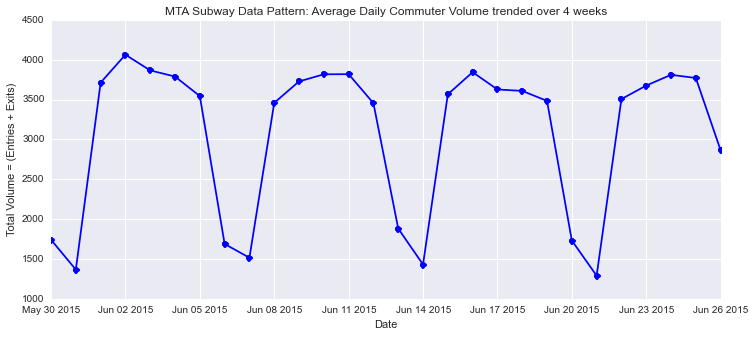

In [20]:
# Challenge 4 Plot

%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(sorted(dates),counts,linestyle='-', marker='o',color='b')
plt.title('MTA Subway Data Pattern: Average Daily Commuter Volume trended over 4 weeks')
plt.xlabel('Date')
plt.ylabel('Total Volume = (Entries + Exits)')

####Challenge 5 & Challenge 6:

In [21]:
# Converting day_counts dictionary to a pandas dataframe using the generator, 'yield'.
# Thanks to Aaron for this insightful code snippet that looks simple, but the generator 'yield' does a powerful job of
# returning each row-column element, against the regular 'return'.

def rows_from_day_counts(day_counts):
    for turnstile, rows in day_counts.iteritems():
        for row in rows:
            yield turnstile + tuple(row)

In [22]:
datetime_count_df = pd.DataFrame(rows_from_day_counts(datetime_count_times))

In [23]:
datetime_count_df.columns = ['CA', 'UNIT','SCP', 'STATION', 'DATE', 'ENTRIES', 'EXITS','TOTAL_TRAFFIC']

####Challenge 7: Plot Total_Traffic (Entries+Exits) for 1 turnstile in station: (Station name: 'World Trade Center)

In [24]:
stnWTCtr_turnstile_df = datetime_count_df[(datetime_count_df['SCP']=='01-00-03') & 
                                            (datetime_count_df['STATION']=='WORLD TRADE CTR') &
                                            (datetime_count_df['DATE'] >= '2015-05-30')]
stnWTCtr_turnstile_df

,CA,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,TOTAL_TRAFFIC
530006,N094,R029,01-00-03,WORLD TRADE CTR,2015-05-30 00:00:00,5,2,7
530007,N094,R029,01-00-03,WORLD TRADE CTR,2015-05-30 04:00:00,0,1,1
530008,N094,R029,01-00-03,WORLD TRADE CTR,2015-05-30 08:00:00,0,0,0
530009,N094,R029,01-00-03,WORLD TRADE CTR,2015-05-30 12:00:00,0,0,0
530010,N094,R029,01-00-03,WORLD TRADE CTR,2015-05-30 16:00:00,2,0,2
530011,N094,R029,01-00-03,WORLD TRADE CTR,2015-05-30 20:00:00,0,0,0
530012,N094,R029,01-00-03,WORLD TRADE CTR,2015-05-31 00:00:00,0,0,0
530013,N094,R029,01-00-03,WORLD TRADE CTR,2015-05-31 04:00:00,0,0,0
530014,N094,R029,01-00-03,WORLD TRADE CTR,2015-05-31 08:00:00,0,0,0
530015,N094,R029,01-00-03,WORLD TRADE CTR,2015-05-31 12:00:00,0,0,0


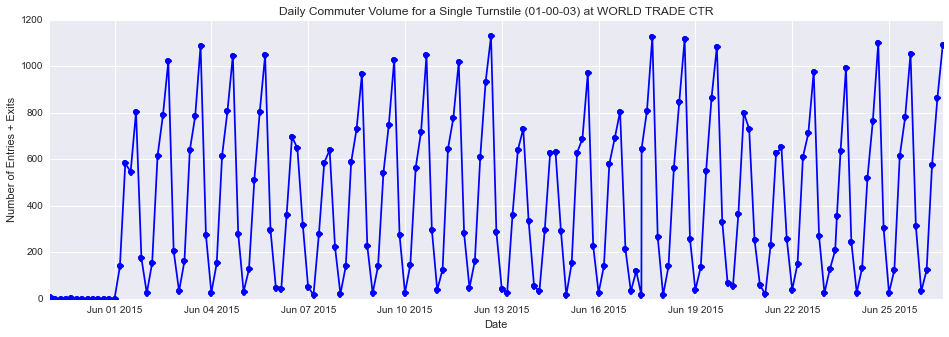

In [25]:
plt.figure(figsize=(16,5))
stnWTCtr_turnstile_df = stnWTCtr_turnstile_df.sort(['DATE'])
plt.plot(stnWTCtr_turnstile_df['DATE'], stnWTCtr_turnstile_df['TOTAL_TRAFFIC'],marker='o',color='b')
plt.title('Daily Commuter Volume for a Single Turnstile (01-00-03) at WORLD TRADE CTR')
plt.xlabel('Date')
plt.ylabel('Number of Entries + Exits')

In [26]:
stnWTCtr_hourly_turnstile_df = datetime_count_df[(datetime_count_df['SCP']=='01-00-03') & 
                                            (datetime_count_df['STATION']=='WORLD TRADE CTR') &
                                            (datetime_count_df['DATE'] >= '2015-06-20') & 
                                          (datetime_count_df['DATE'] <= '2015-06-26')]

stnWTCtr_hourly_turnstile_df = stnWTCtr_hourly_turnstile_df.sort(['DATE'])

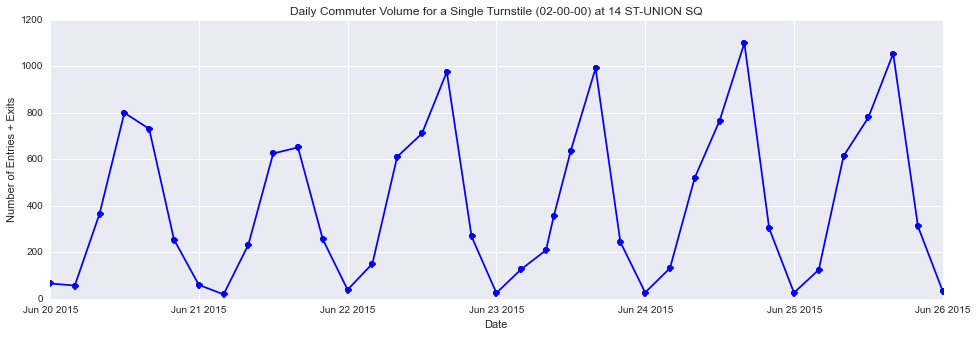

In [27]:
plt.figure(figsize=(16,5))
plt.plot(stnWTCtr_hourly_turnstile_df['DATE'], stnWTCtr_hourly_turnstile_df['TOTAL_TRAFFIC'],marker='o',color='b')
plt.title('Daily Commuter Volume for a Single Turnstile (02-00-00) at 14 ST-UNION SQ')
plt.xlabel('Date')
plt.ylabel('Number of Entries + Exits')

In [28]:
stnWTCtr_hourly_turnstile_df[(stnWTCtr_hourly_turnstile_df['DATE']>='2015-06-25')&
                             (stnWTCtr_hourly_turnstile_df['DATE']<'2015-06-26')]
#datetime_count_df['AMPM'] = datetime_count_df['DATE'].map(lambda x: dateutil.parser.parse(str(x)).weekday())

,CA,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,TOTAL_TRAFFIC
530164,N094,R029,01-00-03,WORLD TRADE CTR,2015-06-25 00:00:00,14,12,26
530165,N094,R029,01-00-03,WORLD TRADE CTR,2015-06-25 04:00:00,44,81,125
530166,N094,R029,01-00-03,WORLD TRADE CTR,2015-06-25 08:00:00,208,406,614
530167,N094,R029,01-00-03,WORLD TRADE CTR,2015-06-25 12:00:00,532,248,780
530168,N094,R029,01-00-03,WORLD TRADE CTR,2015-06-25 16:00:00,763,292,1055
530169,N094,R029,01-00-03,WORLD TRADE CTR,2015-06-25 20:00:00,185,126,311


####Challenge 8: Plot weekday for 1 station for 1 week

In [29]:
datetime_count_df['WEEKDAY'] = datetime_count_df['DATE'].map(lambda x: dateutil.parser.parse(str(x)).weekday())

In [30]:
datetime_count_df['SHORT_DATE'] = datetime_count_df['DATE'].map(lambda x: dateutil.parser.parse(str(x)).date())

In [31]:
weekday_traffic_df = deepcopy(datetime_count_df)
weekday_traffic_df.drop(weekday_traffic_df.columns[[0,1,2,4]], axis=1, inplace=True)
weekday_traffic_df

,STATION,ENTRIES,EXITS,TOTAL_TRAFFIC,WEEKDAY,SHORT_DATE
0,23 ST-5 AVE,62,22,84,5,2015-05-30
1,23 ST-5 AVE,20,22,42,5,2015-05-30
2,23 ST-5 AVE,99,148,247,5,2015-05-30
3,23 ST-5 AVE,242,276,518,5,2015-05-30
4,23 ST-5 AVE,327,250,577,5,2015-05-30
5,23 ST-5 AVE,173,100,273,5,2015-05-30
6,23 ST-5 AVE,54,16,70,6,2015-05-31
7,23 ST-5 AVE,21,16,37,6,2015-05-31
8,23 ST-5 AVE,75,114,189,6,2015-05-31
9,23 ST-5 AVE,205,210,415,6,2015-05-31


In [32]:
#stnWTCtr_weekday_df = weekday_traffic_df[(weekday_traffic_df['STATION']=='WORLD TRADE CTR') & 
 #                                     (weekday_traffic_df['SHORT_DATE'] >='2015-06-26')]
stnWTCtr_weekday_df = pd.DataFrame(weekday_traffic_df.groupby(['STATION','SHORT_DATE','WEEKDAY']).aggregate(np.sum))

In [33]:
#weekday_traffic_df['WEEK#'] = weekday_traffic_df['SHORT_DATE'].map(lambda x: dateutil.parser.parse(str(x)).weekday())

In [34]:
WTC_traffic = stnWTCtr_weekday_df.TOTAL_TRAFFIC['WORLD TRADE CTR']

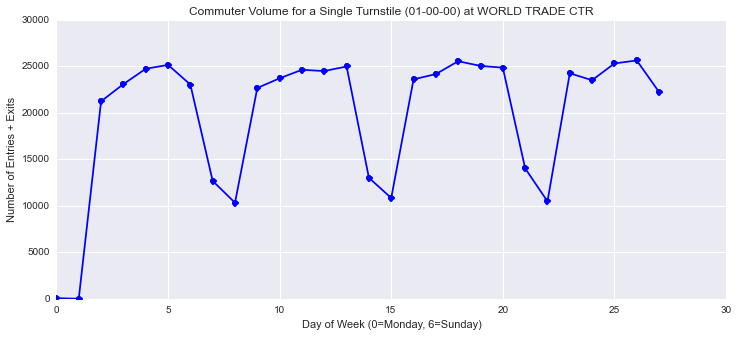

In [35]:
plt.figure(figsize=(12,5))
plt.plot(WTC_traffic,
         marker='o',color='b')
plt.title('Commuter Volume for a Single Turnstile (01-00-00) at WORLD TRADE CTR')
plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
plt.ylabel('Number of Entries + Exits')

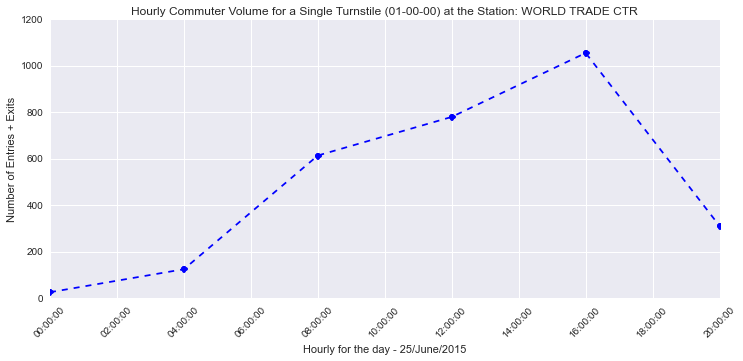

In [37]:
st14_hourly_df = stnWTCtr_hourly_turnstile_df[(stnWTCtr_hourly_turnstile_df['DATE']>='2015-06-25')
                                                            &(stnWTCtr_hourly_turnstile_df['DATE']<'2015-06-26')]
plt.figure(figsize=(12,5))
plt.plot(st14_hourly_df['DATE'], st14_hourly_df['TOTAL_TRAFFIC'] ,linestyle='--', marker='o',color='b')
plt.title('Hourly Commuter Volume for a Single Turnstile (01-00-00) at the Station: WORLD TRADE CTR')
plt.xticks(rotation=45)
plt.xlabel('Hourly for the day - 25/June/2015')
plt.ylabel('Number of Entries + Exits')

In [56]:
groupedby_stn_4hourly = pd.DataFrame(datetime_count_df.groupby(['STATION','DATE'])['TOTAL_TRAFFIC'].aggregate(np.sum))

In [73]:
groupedby_stn_4hourly = groupedby_stn_4hourly.reset_index()

In [74]:
groupedby_stn_4hourly

,STATION,DATE,TOTAL_TRAFFIC
0,1 AVE,2015-05-30 00:00:00,3229
1,1 AVE,2015-05-30 04:00:00,1689
2,1 AVE,2015-05-30 08:00:00,5883
3,1 AVE,2015-05-30 12:00:00,9583
4,1 AVE,2015-05-30 16:00:00,11099
5,1 AVE,2015-05-30 20:00:00,9313
6,1 AVE,2015-05-31 00:00:00,3259
7,1 AVE,2015-05-31 04:00:00,1181
8,1 AVE,2015-05-31 08:00:00,4351
9,1 AVE,2015-05-31 12:00:00,7868


In [177]:
def plot_hourly_stn_vol(df,stationname, date1, date2):
    hourly_df = df[stationname & date1 & date2]
    plt.figure(figsize=(18,5))
    plt.plot(hourly_df['DATE'], hourly_df['TOTAL_TRAFFIC'] ,linestyle='--', marker='o',color='b')
    plt.title('Hourly Commuter Volume at the Station: CHAMBERS ST')
    plt.xticks(rotation=0)
    plt.xlabel('Hourly (June/22 - June/25, 2015)')
    plt.ylabel('# of commuters going in/out of the station')
    return plt

In [178]:
outlier_rem_df = groupedby_stn_4hourly[(groupedby_stn_4hourly['TOTAL_TRAFFIC'] >= 0) & 
                                       (groupedby_stn_4hourly['TOTAL_TRAFFIC'] <= 200000)]
stationname=outlier_rem_df['STATION']=='CHAMBERS ST'
date1=outlier_rem_df['DATE'] >='2015-06-22'
date2=outlier_rem_df['DATE'] <='2015-06-25'

<module 'matplotlib.pyplot' from '/Users/hadoop/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

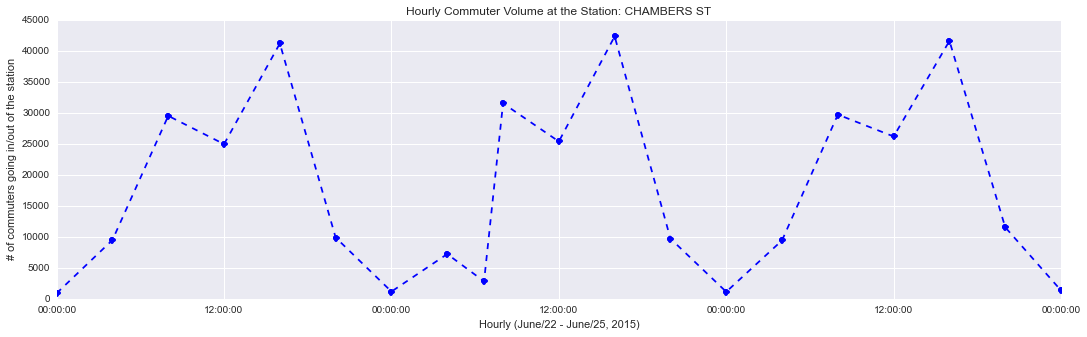

In [179]:
plot_hourly_stn_vol(outlier_rem_df,stationname, date1, date2)

####Challenge 9: Ridership per station per day (multiple weeks of data)

In [ ]:
#datetime_count_df['RECORD_DATE'] = datetime_count_df['DATE'].map(lambda x: dateutil.parser.parse(str(x)).date())

In [94]:
station_traffic_df = deepcopy(weekday_traffic_df)
station_traffic_df.drop(station_traffic_df.columns[[1,2]], axis=1, inplace=True)
station_traffic_df

,STATION,TOTAL_TRAFFIC,WEEKDAY,SHORT_DATE
0,23 ST-5 AVE,84,5,2015-05-30
1,23 ST-5 AVE,42,5,2015-05-30
2,23 ST-5 AVE,247,5,2015-05-30
3,23 ST-5 AVE,518,5,2015-05-30
4,23 ST-5 AVE,577,5,2015-05-30
5,23 ST-5 AVE,273,5,2015-05-30
6,23 ST-5 AVE,70,6,2015-05-31
7,23 ST-5 AVE,37,6,2015-05-31
8,23 ST-5 AVE,189,6,2015-05-31
9,23 ST-5 AVE,415,6,2015-05-31


In [95]:
station_df = datetime_count_df.groupby(['STATION', 'SHORT_DATE', 'WEEKDAY'])
station_df = station_df.agg({'TOTAL_TRAFFIC' : np.sum}).reset_index()
station_df.head(9)

,STATION,SHORT_DATE,WEEKDAY,TOTAL_TRAFFIC
0,1 AVE,2015-05-30,5,40796
1,1 AVE,2015-05-31,6,30574
2,1 AVE,2015-06-01,0,48867
3,1 AVE,2015-06-02,1,52014
4,1 AVE,2015-06-03,2,52133
5,1 AVE,2015-06-04,3,50111
6,1 AVE,2015-06-05,4,53185
7,1 AVE,2015-06-06,5,40973
8,1 AVE,2015-06-07,6,33285


In [161]:
outlier_rem_df = station_df[(station_df['TOTAL_TRAFFIC'] >= 0) & 
                                        (station_df['TOTAL_TRAFFIC'] <= 300000)]

In [162]:
outlier_rem_df.describe()

,WEEKDAY,TOTAL_TRAFFIC
count,10663.000000,10663.000000
mean,3.004783,22756.861859
std,1.999877,30909.196018
min,0.000000,0.000000
25%,1.000000,6430.000000
50%,3.000000,12346.000000
75%,5.000000,25613.500000
max,6.000000,282619.000000


In [163]:
weekly_WTCtr_station_df = outlier_rem_df[(outlier_rem_df['STATION']=='WORLD TRADE CTR')]

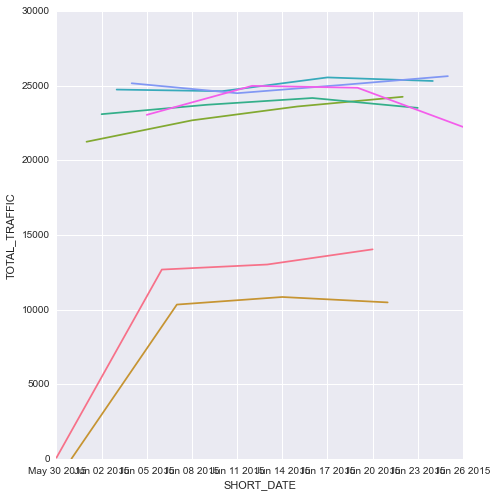

In [164]:
weekly_WTCtr_plot = sns.FacetGrid(weekly_WTCtr_station_df, hue='WEEKDAY', size = 7)
weekly_WTCtr_plot.map(plt.plot, 'SHORT_DATE', 'TOTAL_TRAFFIC')

In [170]:
top_traffic_stations_df = outlier_rem_df.pivot_table(values='TOTAL_TRAFFIC', index=['STATION'], \
                               aggfunc=lambda x: np.sum(x)).order(ascending=False)
top_traffic_stations_df.head(15)


STATION
34 ST-HERALD SQ    5772108
14 ST-UNION SQ     5371647
86 ST              5140385
42 ST-TIMES SQ     4799186
42 ST-PA BUS TE    4082748
FULTON ST          3475998
125 ST             3446818
59 ST-COLUMBUS     3251681
96 ST              3251223
CANAL ST           3228102
23 ST              2945579
59 ST              2936973
47-50 ST-ROCK      2934322
MAIN ST            2795551
CHAMBERS ST        2750355
Name: TOTAL_TRAFFIC, dtype: int64

####Challenge 10: Plot the stations in the descending order of total traffic

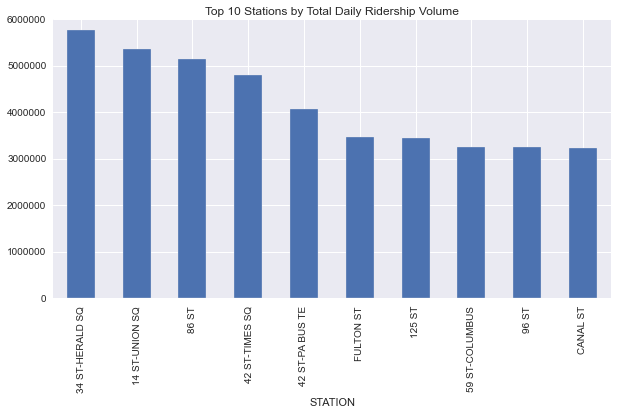

In [181]:

top_traffic_stations_df[:10].plot(kind='bar',
                                  title="Top 10 Stations by Total Daily Ridership Volume",
                                    figsize=(10,5))

In [ ]:
penn34st = stnWTCtr_weekday_df.TOTAL_TRAFFIC['42 ST-PA BUS TE']

In [180]:
penn34st

NameError: name 'penn34st' is not defined